 <center><h1>Mens T20 Cricket World Cup Analysis 2024 </h1></center>


<center><h2 id = "sec1" >Importing Required Libraries and Dataset</h2></center>
<a id = 'sec1'></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

<center><h2 id = 'sec2'>Overview of Data</h2></center>

In [4]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
matches.head

<bound method NDFrame.head of     season                     team1                     team2        date  \
0     2024                    Canada  United States of America  2024/06/01   
1     2024          Papua New Guinea               West Indies  2024/06/02   
2     2024                      Oman                   Namibia  2024/06/02   
3     2024                 Sri Lanka              South Africa  2024/06/03   
4     2024               Afghanistan                    Uganda  2024/06/03   
5     2024                  Scotland                   England  2024/06/04   
6     2024                     Nepal               Netherlands  2024/06/04   
7     2024                   Ireland                     India  2024/06/05   
8     2024          Papua New Guinea                    Uganda  2024/06/05   
9     2024                 Australia                      Oman  2024/06/05   
10    2024                  Pakistan  United States of America  2024/06/06   
11    2024                   Namib

In [6]:
deliveries.shape

(11472, 22)

In [7]:
matches.shape

(52, 18)

In [8]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [9]:
matches.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

In [10]:
deliveries.describe()

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,11472.000000,11472.0,11472.000000,11472.000000,11472.000000,11472.000000,408.000000,45.0,41.000000,179.000000,1.0,0.0,0.0
mean,26.879794,2024.0,1.465394,9.108439,1.062413,0.076360,1.245098,1.0,2.073171,1.301676,5.0,NaN,NaN
std,16.343629,0.0,0.508687,5.612894,1.566343,0.375929,0.857816,0.0,1.311302,0.866705,NaN,NaN,NaN
min,0.000000,2024.0,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,12.000000,2024.0,1.000000,4.300000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,26.000000,2024.0,1.000000,8.700000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,42.000000,2024.0,2.000000,13.600000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,54.000000,2024.0,4.000000,19.800000,6.000000,5.000000,5.000000,1.0,4.000000,5.000000,5.0,NaN,NaN


In [11]:
matches.describe()

,season,match_number,winner_runs,winner_wickets
count,52.0,52.000000,25.000000,24.000000
mean,2024.0,27.961538,40.240000,6.416667
std,0.0,16.453096,38.411457,2.244155
min,2024.0,1.000000,1.000000,2.000000
25%,2024.0,13.750000,12.000000,5.000000
50%,2024.0,27.500000,25.000000,7.000000
75%,2024.0,42.250000,50.000000,8.000000
max,2024.0,55.000000,134.000000,10.000000


In [12]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11472 entries, 0 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                11472 non-null  int64  
 1   season                  11472 non-null  int64  
 2   start_date              11472 non-null  object 
 3   venue                   11472 non-null  object 
 4   innings                 11472 non-null  int64  
 5   ball                    11472 non-null  float64
 6   batting_team            11472 non-null  object 
 7   bowling_team            11472 non-null  object 
 8   striker                 11472 non-null  object 
 9   non_striker             11472 non-null  object 
 10  bowler                  11472 non-null  object 
 11  runs_off_bat            11472 non-null  int64  
 12  extras                  11472 non-null  int64  
 13  wides                   408 non-null    float64
 14  noballs                 45 non-null   

In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           52 non-null     int64  
 1   team1            52 non-null     object 
 2   team2            52 non-null     object 
 3   date             52 non-null     object 
 4   match_number     52 non-null     int64  
 5   venue            52 non-null     object 
 6   city             52 non-null     object 
 7   toss_winner      52 non-null     object 
 8   toss_decision    52 non-null     object 
 9   player_of_match  51 non-null     object 
 10  umpire1          52 non-null     object 
 11  umpire2          52 non-null     object 
 12  reserve_umpire   52 non-null     object 
 13  match_referee    52 non-null     object 
 14  winner           50 non-null     object 
 15  winner_runs      25 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       5

In [14]:
# total venues
venue=matches.venue.unique()
venue

array(['Grand Prairie Stadium', 'Providence Stadium', 'Kensington Oval',
       'Nassau County International Cricket Stadium',
       'Sir Vivian Richards Stadium', 'Brian Lara Stadium',
       'Arnos Vale Ground', 'Daren Sammy National Cricket Stadium',
       'Central Broward Regional Park Stadium Turf Ground'], dtype=object)

In [15]:
## filling super over winners
matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'), 'winner'] = matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'), 'winner'].fillna('Namibia')
matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'] = matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'].fillna('United States of America')

<center><h2 id = 'sec3'>Analysis and Obsevations by Graphs</h2></center>

In [16]:
## Which team won the most matches?

win_counts = matches['winner'].value_counts()

max_wins = win_counts.max()
teams_with_most_wins = win_counts[win_counts == max_wins].index.tolist()

teams_str = ", ".join(teams_with_most_wins)
print(f"Teams with the most wins: {teams_str} ({max_wins} wins)")

Teams with the most wins: South Africa, India (8 wins)


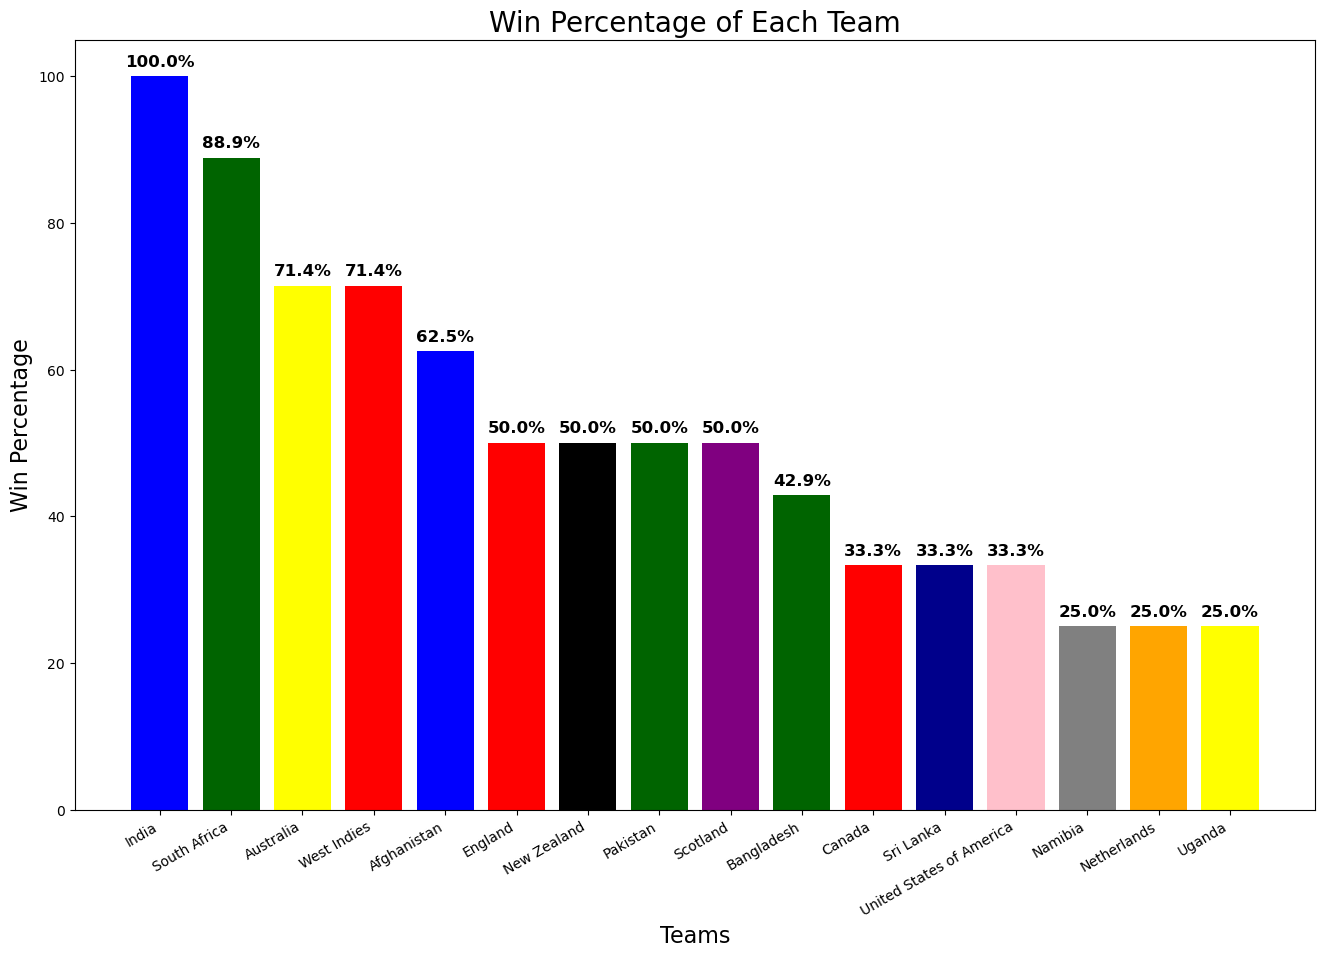

In [17]:
## What is the win percentage of each team?

all_teams = pd.concat([matches['team1'], matches['team2']])

total_matches = all_teams.value_counts()

team_wins = matches['winner'].value_counts()

win_percentage = (team_wins / total_matches) * 100

win_percentage_sorted = win_percentage.sort_values(ascending=False)

win_percentage_sorted = win_percentage_sorted[win_percentage_sorted > 0]

nation_colors = {
    'India': 'blue',
    'Afghanistan': 'blue',
    'Uganda': 'yellow',
    'Australia': 'yellow',
    'New Zealand': 'black',
    'South Africa': 'darkgreen',
    'Pakistan': 'darkgreen',
    'Bangladesh': 'darkgreen',
    'West Indies': 'red',
    'Scotland': 'purple',
    'Netherlands': 'orange',
    'United States of America': 'pink',
    'Sri Lanka': 'darkblue',
    'Canada': 'red',
    'England': 'red'
}

colors = [nation_colors.get(team, 'gray') for team in win_percentage_sorted.index]

plt.figure(figsize=(16, 10))

bars = plt.bar(win_percentage_sorted.index, win_percentage_sorted, color=colors)

plt.xlabel('Teams', fontsize=16)
plt.ylabel('Win Percentage', fontsize=16)
plt.title('Win Percentage of Each Team', fontsize=20)
plt.xticks(rotation=30, ha='right')


for bar, percentage in zip(bars, win_percentage_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, weight='bold')
plt.show()


<center><h2 id = 'sec3.1'>Batting Record and Stats</h2></center>

<center><h3 id = 'sec3.1.1'>1. Highest Run scorer in Season</h3></center>

In [18]:
top_run_scorer = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).reset_index()

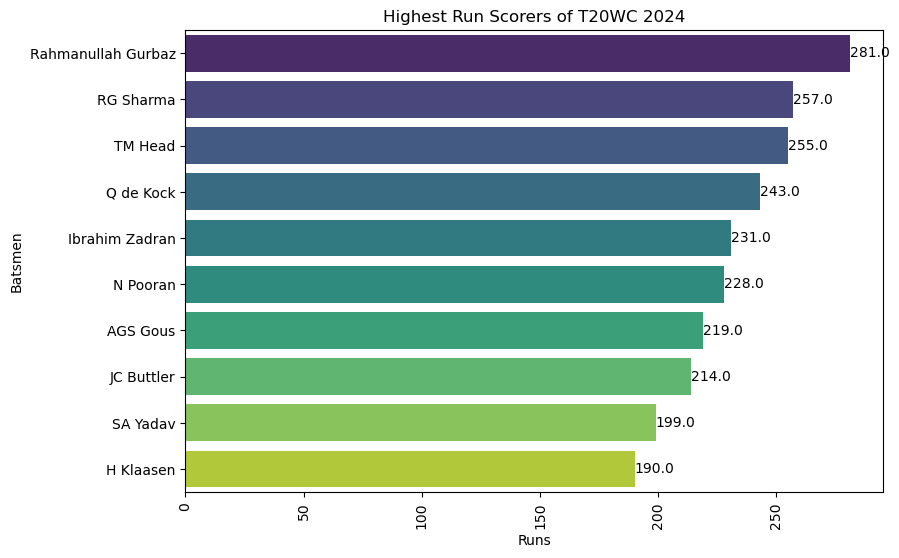

In [19]:
plt.figure(figsize=(9,6))  # Set figure size for better readability
ax=sns.barplot(data=top_run_scorer[:10], x='runs_off_bat', y='striker', palette='viridis')

# Add titles and labels
plt.title('Highest Run Scorers of T20WC 2024')
plt.xlabel('Runs')
plt.ylabel('Batsmen')

# Add count values on top of each bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, f'{width}',
            va='center', ha='left', fontsize=10, color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# No legend needed, so avoid calling legend() if it's not used
plt.show()

**OBSERVATIONS**
- Highest run scored by Player in T20WC 2024 is 281 by **Rahmanullah Gurbaz**.
- **Rohit Sharma** is on second spot with 257 runs
- And **Travis Head** is on third spot with 255 runs
---

 
<center><h2 id = 'sec3.1.2'>2. Highest Individual Score by a player</h2></center>

In [20]:
highest_individual_score = deliveries.groupby(['match_id', 'striker'])['runs_off_bat'].sum().sort_values(ascending=False)
highest_individual_score.head()
highest_individual_score = highest_individual_score.reset_index()
highest_individual_score.head(10)

,match_id,striker,runs_off_bat
0,39,N Pooran,98
1,0,Aaron Jones,94
2,50,RG Sharma,92
3,41,PD Salt,87
4,48,JC Buttler,83
5,45,SD Hope,82
6,40,AGS Gous,80
7,13,Rahmanullah Gurbaz,80
8,54,V Kohli,76
9,50,TM Head,76


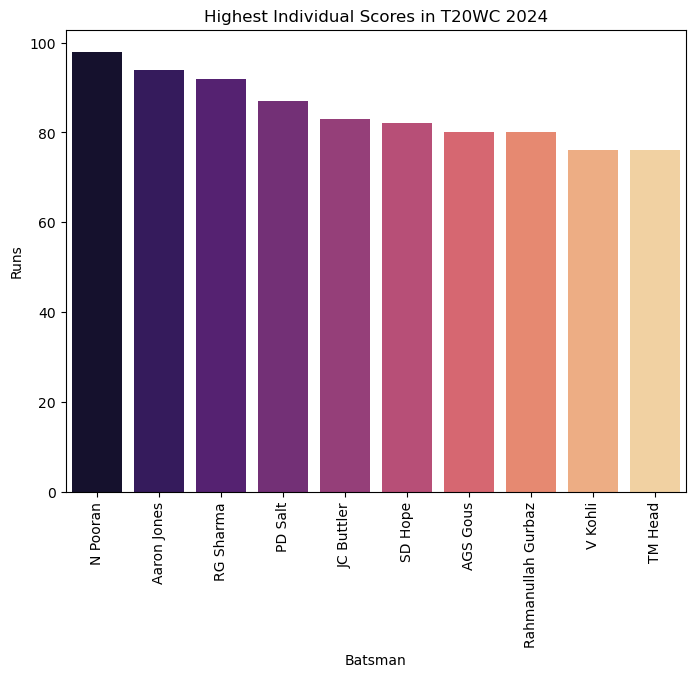

In [21]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=highest_individual_score[:10], x='striker', y='runs_off_bat', palette='magma')
# Add title and labels
plt.title('Highest Individual Scores in T20WC 2024')
plt.xlabel('Batsman')
plt.ylabel('Runs')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

**OBSERVATIONS**
- Highest Individual Runs came from the bat of **Nicolas Pooran** with **98 runs.**
- **Aaron James** is on second spot with **94 runs** in his Debut match. 
- **Rohit Sharma** is on third spot with **92 runs.**
---

### 
<center><h3 id = 'sec3.1.3'>3. Most Sixes By Player in T20WC 2024</h3></center>

In [22]:
sixes_df = deliveries[deliveries['runs_off_bat'] == 6]
fours_df = deliveries[deliveries['runs_off_bat'] == 4]

In [23]:
most_sixes_by_striker = sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
most_sixes_by_striker.head(10)

,striker,runs_off_bat
0,N Pooran,17
1,Rahmanullah Gurbaz,16
2,RG Sharma,15
3,TM Head,15
4,Aaron Jones,14
5,H Klaasen,13
6,Q de Kock,13
7,AGS Gous,11
8,JC Buttler,10
9,MP Stoinis,10


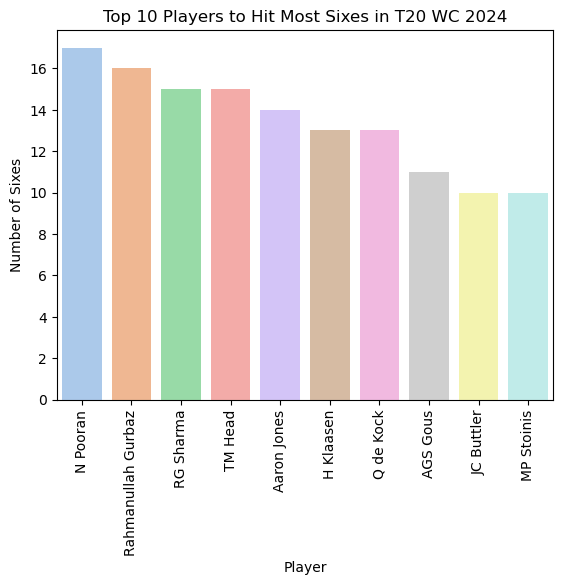

In [24]:
sns.barplot(data=most_sixes_by_striker[:10],x='striker',y='runs_off_bat', palette='pastel')
plt.title('Top 10 Players to Hit Most Sixes in T20 WC 2024')
plt.xlabel('Player')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=90)
plt.show()

**OBSERVATIONS**
- **Nicolas Pooran** holds the record of hitting 17 sixes in T20WC 2024.
- **Rahmanullah Gurbaz** is on second spot with 16 sixes
- And **Rohit Sharma** is on third spot with 15 sixes
---


<center><h3 id = 'sec3.1.4'>4. Most Sixes By Player in Single Inning in T20WC 202</h3></center>

In [25]:
most_sixes_by_striker_in_single_inning =  sixes_df.groupby(['match_id', 'striker'])['runs_off_bat'].count().sort_values(ascending=False)
most_sixes_by_striker_in_single_inning = most_sixes_by_striker_in_single_inning.reset_index()
most_sixes_by_striker_in_single_inning.head(10)

,match_id,striker,runs_off_bat
0,0,Aaron Jones,10
1,39,N Pooran,8
2,45,SD Hope,8
3,50,RG Sharma,8
4,48,JC Buttler,7
5,9,MP Stoinis,6
6,25,SE Rutherford,6
7,34,BJ McMullen,6
8,40,Q de Kock,5
9,40,AGS Gous,5


**OBSERVATIONS**
- **Aaron James** holds the record of hitting 10 sixes in single inning in T20WC 2024.
- **SD Hopes**, **Rohit Sharma** & **Nicolas Pooran** are on second spot with 8 sixes.
- And **Josh Buttler** is on third spot with 7 sixes.
---


<center><h3 id = 'sec3.1.5'>5. Most Fours By a Player in T20WC 2024</h3></center>

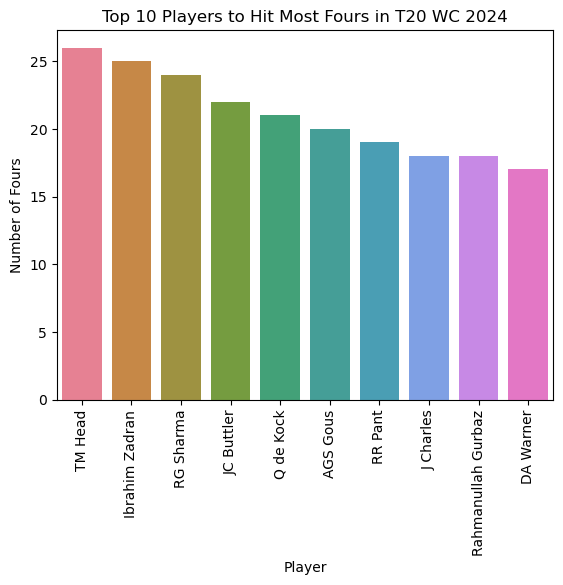

In [26]:
most_fours_by_striker = fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
sns.barplot(data=most_fours_by_striker.head(10),x='striker', y='runs_off_bat', palette='husl')
plt.title('Top 10 Players to Hit Most Fours in T20 WC 2024')
plt.xlabel('Player')
plt.ylabel('Number of Fours')
plt.xticks(rotation=90)
plt.show()

**OBSERVATIONS**
- **Travis Head** holds the record of hitting 26 fours in T20WC 2024.
- **Ibrahim Zadran** is on second spot with 25 fours
- **Rohit Sharma** is on third spot with 24 fours
---


<center><h3 id = 'sec3.1.6'>6. Most Fours in a single inning in T20WC 2024</h3></center>

In [27]:
most_fours_by_striker_in_single_inning =  fours_df.groupby(['match_id', 'striker'])['runs_off_bat'].count().sort_values(ascending=False)
most_fours_by_striker_in_single_inning = most_fours_by_striker_in_single_inning.reset_index()
most_fours_by_striker_in_single_inning.head(10)

,match_id,striker,runs_off_bat
0,19,BJ McMullen,9
1,34,MP Stoinis,9
2,50,TM Head,9
3,26,Shakib Al Hasan,9
4,4,Ibrahim Zadran,9
5,39,J Charles,8
6,41,PD Salt,7
7,0,AGS Gous,7
8,44,HC Brook,7
9,1,BA King,7


**OBSERVATIONS**
- **Marcus Stoinis**, **Shakib Al Hasan**, **Travis Head**, **Ibrahim Zadran** and **BJ McMullen** hold the record of hitting 9 fours in single inning.
- **J Charles** is on second spot with 8 fours.
- And **BA King**, **AGS Gous**, **P Nissanka** and **Phil Salt** are on third spot with 7 fours.
---


<center><h2 id = 'sec3.2.1'>Bowling Record and Stats</h2></center>

### 
<center><h3 id = 'sec3.2.1'>1. Highest Wicket Taker in T20WC 2024</h3></center>

In [28]:
bowlers_column = ['start_date', 'match_id', 'venue','bowler' ,'runs_off_bat', 'extras', 'wides','noballs', 'wicket_type']
bowler_df = deliveries[bowlers_column]
bowler_df.fillna(np.nan)
total_runs_given = bowler_df['runs_off_bat'] + bowler_df['extras']
bowler_df['total_runs_given'] = total_runs_given

In [29]:
most_wickets = bowler_df.groupby(['bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index()
most_wickets.head(10)

,bowler,wicket_type
0,Arshdeep Singh,18
1,Fazalhaq Farooqi,17
2,Naveen-ul-Haq,16
3,A Nortje,16
4,JJ Bumrah,15
5,K Rabada,15
6,AS Joseph,14
7,Rishad Hossain,14
8,Rashid Khan,14
9,A Zampa,13


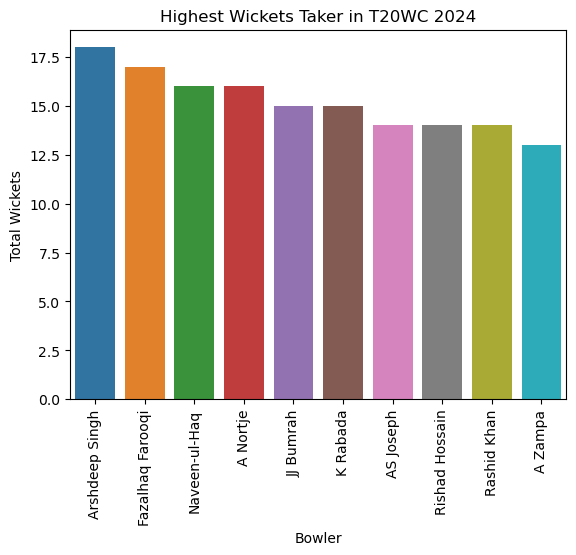

In [30]:
plt.title('Highest Wickets Taker in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = most_wickets['bowler'].head(10), y = most_wickets['wicket_type'].head(10))
plt.ylabel('Total Wickets')
plt.xlabel('Bowler')
plt.show()

**OBSERVATIONS**
- **Arshdeep Singh** is the highest wicket taker of T20WC 2024 with 18 wickets.
- **Fazalhaq Farooqi** is on second spot with 17 wickets
- And **A Nortje** and **Naveen-ul-Haq** are on third spot with 16 wickets
---

<center><h3 id = 'sec3.2.2'>2. Most Wickets in Single Inning in T20WC 2024</h3></center>

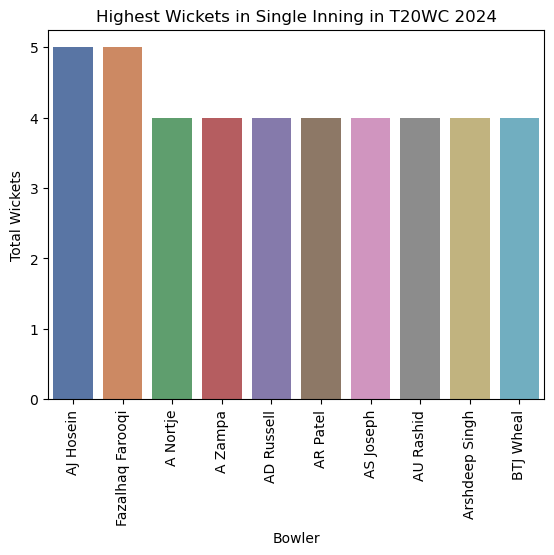

In [31]:
most_wickets_in_inning = deliveries.groupby(['match_id', 'bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index()
most_wickets_in_inning = most_wickets_in_inning.sort_values(by=['wicket_type', 'bowler'], ascending=[False, True])
plt.title('Highest Wickets in Single Inning in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = most_wickets_in_inning['bowler'].head(10), y = most_wickets_in_inning['wicket_type'],palette='deep')
plt.ylabel('Total Wickets')
plt.xlabel('Bowler')
plt.show()

**OBSERVATIONS**
- **AJ Hosein** and **Fazalhaq Farooqi** hold the record of taking **5** wickets in single inning in T20WC 2024.
---

<center><h3 id = 'sec3.2.3'>3. Players with the Best Economy Rates in T20WC 2024</h3></center>

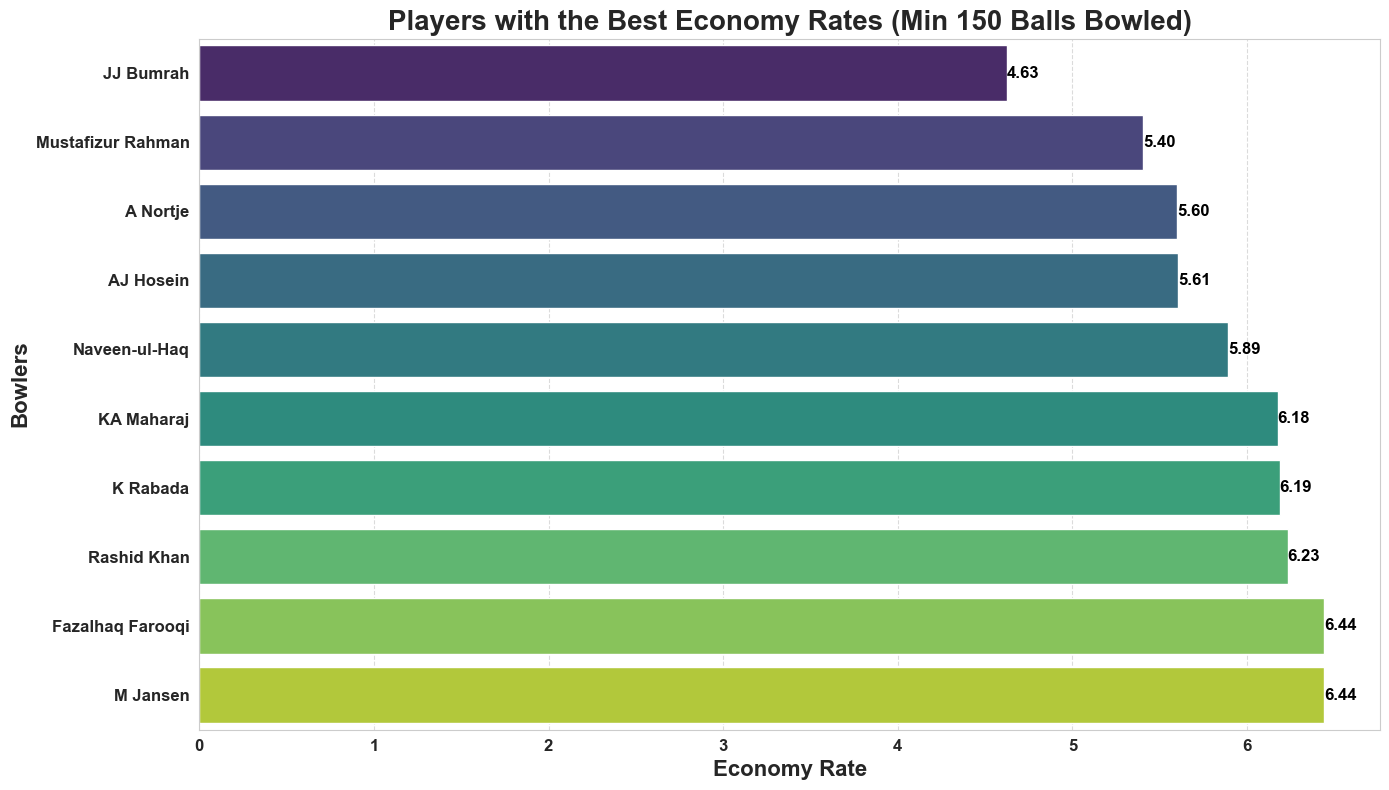

In [32]:
balls_bowled = deliveries.groupby('bowler').size()
runs_conceded = deliveries.groupby('bowler')['runs_off_bat'].sum() + deliveries.groupby('bowler')['extras'].sum()

economy_rate = (runs_conceded / (balls_bowled / 6))

filtered_economy_rate = economy_rate[balls_bowled >= 150]

best_economy_rates = filtered_economy_rate.sort_values().head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=best_economy_rates.values, y=best_economy_rates.index, palette='viridis')
plt.title('Players with the Best Economy Rates (Min 150 Balls Bowled)', fontsize=20, weight='bold')
plt.xlabel('Economy Rate', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(best_economy_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**OBSERVATIONS**
- **J Bumrah** hold the record of best economy rate **4.63** in T20WC 2024.

## 
<center><h2 id = 'sec3.3'>Venue Analysis and Stats</h2></center>

### 
<center><h3 id = 'sec3.3.1'>1. Most Number of Sixes at a Stadium in T20WC 2024</h3></center>

In [33]:
sixes_at_venue = sixes_df.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
sixes_at_venue.head()

,venue,runs_off_bat
0,"Kensington Oval, Bridgetown, Barbados",110
1,"Daren Sammy National Cricket Stadium, Gros Isl...",103
2,"Sir Vivian Richards Stadium, North Sound, Antigua",99
3,"Nassau County International Cricket Stadium, N...",55
4,"Grand Prairie Stadium, Dallas",46


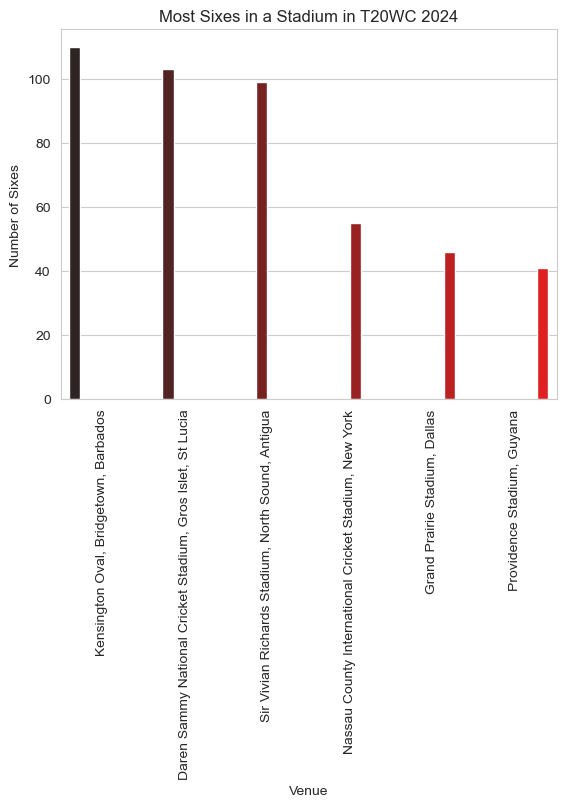

In [34]:
plt.title('Most Sixes in a Stadium in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = sixes_at_venue['venue'].head(6), y = sixes_at_venue['runs_off_bat'].head(6), hue = sixes_at_venue['venue'].head(6), palette='dark:red')
plt.ylabel('Number of Sixes')
plt.xlabel('Venue')
plt.legend().remove()
plt.show()

**OBSERVATIONS**
- At **Kensington Oval, Bridgetown, Barbados** 110 sixes were hit which is highest.
- At **Daren Sammy National Cricket Stadium, Gros Islet, St Lucia** 103 sixes were hit
---

### 
<center><h3 id = 'sec3.3.2'>2. Most Number of Fours at a Stadium in T20WC 2024</h3></center>

In [35]:
fours_at_venue = fours_df.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).reset_index()

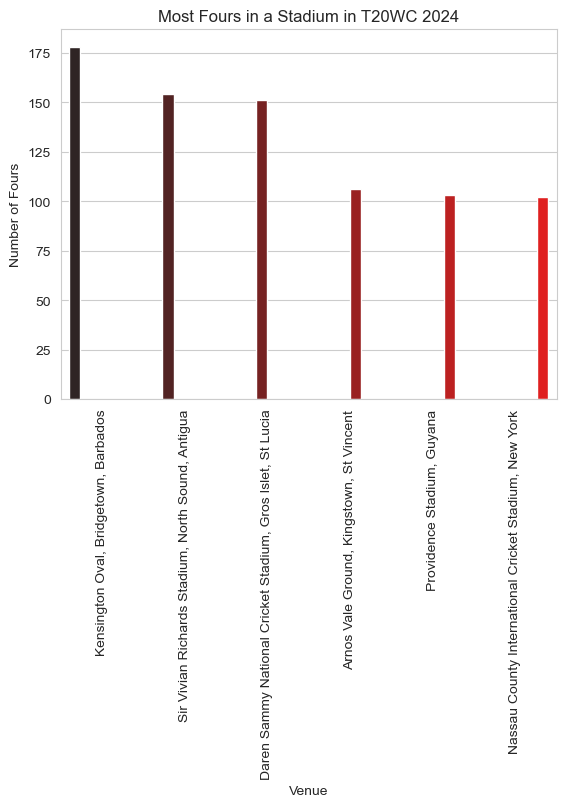

In [36]:
plt.title('Most Fours in a Stadium in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = fours_at_venue['venue'].head(6), y = fours_at_venue['runs_off_bat'].head(6), hue = fours_at_venue['venue'].head(6), palette='dark:red')
plt.ylabel('Number of Fours')
plt.xlabel('Venue')
plt.legend().remove()
plt.show()

**OBSERVATIONS**
- At **Kensington Oval, Bridgetown, Barbados**, 178 fours were hit which is highest.
- At **Sir Vivian Richards Stadium, North Sound, Antigua**, 154 fours were hit
---

### 
<center><h3 id = 'sec3.3.3'>3. Highest Total Runs at a Stadium in T20WC 2024</h3></center>

In [37]:
total_runs_in_venue = deliveries.groupby(['venue'])[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = total_runs_in_venue['runs_off_bat'] + total_runs_in_venue['extras']
total_runs_in_venue['total_runs'] = total_runs
total_runs_in_venue.head(10)

,venue,runs_off_bat,extras,total_runs
0,"Kensington Oval, Bridgetown, Barbados",2311,145,2456
1,"Daren Sammy National Cricket Stadium, Gros Isl...",1976,107,2083
2,"Sir Vivian Richards Stadium, North Sound, Antigua",1862,101,1963
3,"Nassau County International Cricket Stadium, N...",1579,130,1709
4,"Providence Stadium, Guyana",1292,97,1389
5,"Grand Prairie Stadium, Dallas",1115,89,1204
6,"Arnos Vale Ground, Kingstown, St Vincent",1107,101,1208
7,"Brian Lara Stadium, Tarouba, Trinidad",743,92,835
8,Central Broward Regional Park Stadium Turf Gro...,203,14,217


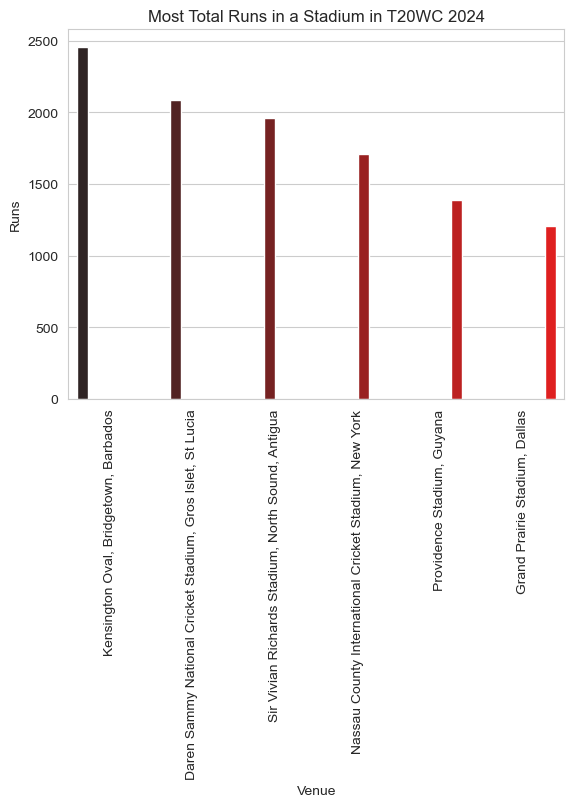

In [38]:
plt.title('Most Total Runs in a Stadium in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = total_runs_in_venue['venue'].head(6), y = total_runs_in_venue['total_runs'].head(6), hue = total_runs_in_venue['venue'].head(6), palette='dark:red')
plt.ylabel('Runs')
plt.xlabel('Venue')
plt.legend().remove()
plt.show()

**OBSERVATIONS**
- **Kensington Oval, Bridgetown, Barbados** has total 2456 runs which is highest in T20WC 2024.
- **Daren Sammy National Cricket Stadium, Gros Islet, St Lucia** has total 2083 runs.
---

## 
<center><h2 id = 'sec3.4'>Team Analysis and Stats</h2></center>

### 
<center><h3 id = 'sec3.4.1'>1. Teams Played in T20WC 2024</h3></center>

In [39]:
teams = deliveries['batting_team'].unique()
teams = pd.DataFrame(teams)
teams.rename(columns={0:'Team'}, inplace=True)
teams.head()
print('Teams Playing in T20 2024')
for i in range(len(teams)):
    print(str(i+1) + '.', teams['Team'].str.upper()[i])

Teams Playing in T20 2024
1. PAPUA NEW GUINEA
2. WEST INDIES
3. CANADA
4. UNITED STATES OF AMERICA
5. OMAN
6. NAMIBIA
7. SRI LANKA
8. SOUTH AFRICA
9. AFGHANISTAN
10. UGANDA
11. SCOTLAND
12. NEPAL
13. NETHERLANDS
14. IRELAND
15. INDIA
16. AUSTRALIA
17. PAKISTAN
18. NEW ZEALAND
19. BANGLADESH
20. ENGLAND



<center><h3 id = 'sec3.4.2'>2. Total Runs by a Team in T20WC 2024</h3></center>

In [40]:
total_team_score = deliveries.groupby('batting_team')[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = total_team_score['runs_off_bat'] + total_team_score['extras']
total_team_score['total_runs'] = total_runs
total_team_score.head(10)
total_team_score.head(10)

,batting_team,runs_off_bat,extras,total_runs
0,India,1201,55,1256
1,South Africa,1058,66,1124
2,West Indies,1056,66,1122
3,Australia,981,52,1033
4,Afghanistan,922,88,1010
5,England,856,38,894
6,United States of America,840,63,903
7,Bangladesh,819,71,890
8,Scotland,544,36,580
9,Pakistan,467,36,503


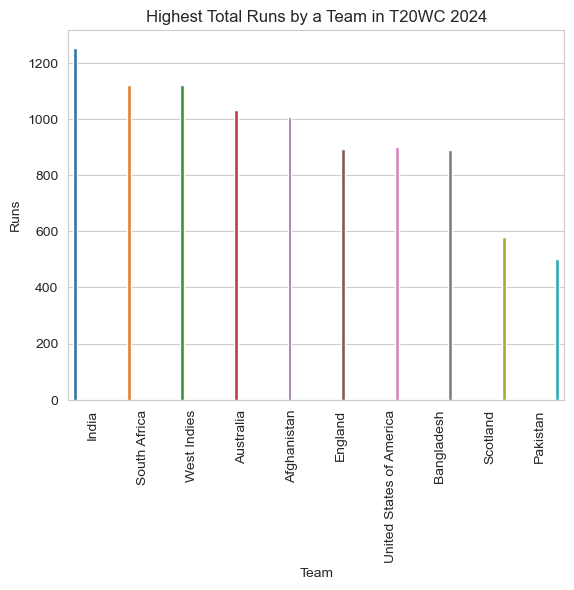

In [41]:
plt.title('Highest Total Runs by a Team in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = total_team_score['batting_team'].head(10), y = total_team_score['total_runs'].head(10), hue = total_team_score['batting_team'].head(10))
plt.ylabel('Runs')
plt.xlabel('Team')
plt.legend().remove()
plt.show()

**OBSERVATIONS**
- **India** has total 1256 runs in T20WC 2024 which is highest.
- On the second spot there is **South Africa** with 1124 runs.
- And on the third spot there is **West Indies** with 1122 runs.
---

### 
<center><h3 id = 'sec3.4.3'>3. Highest Total by Team in T20WC 2024</h3></center>

In [42]:
highest_total_by_team = deliveries.groupby(['match_id', 'batting_team'])[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = highest_total_by_team['runs_off_bat'] + highest_total_by_team['extras']
highest_total_by_team['total_runs'] = total_runs
highest_total_by_team.head(10)

,match_id,batting_team,runs_off_bat,extras,total_runs
0,39,West Indies,203,15,218
1,50,India,202,3,205
2,16,Australia,194,7,201
3,37,Sri Lanka,193,8,201
4,46,India,189,7,196
5,40,South Africa,187,7,194
6,0,Canada,184,10,194
7,0,United States of America,178,19,197
8,34,Australia,175,11,186
9,4,Afghanistan,173,10,183


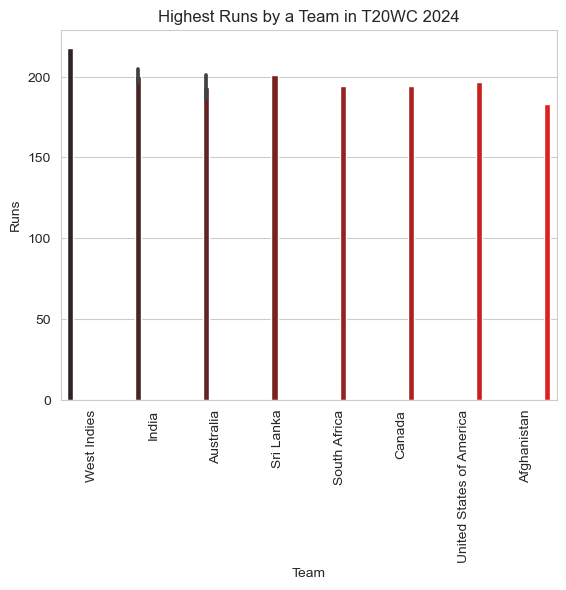

In [43]:
plt.title('Highest Runs by a Team in T20WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = highest_total_by_team['batting_team'].head(10), y = highest_total_by_team['total_runs'].head(10), hue = highest_total_by_team['batting_team'].head(10), palette='dark:red')
plt.ylabel('Runs')
plt.xlabel('Team')
plt.legend().remove()
plt.show()

**OBSERVATIONS**
- **West Indies** scored a total of 218 runs in T20WC which is highest.
- **India** is on second rank with 196 and 205 runs.
- **Australia** is on third spot with 201 and 186 runs.
---

## 
<center><h2 id = 'sec3.5'>Other Analysis and Stats</h2></center>

<center><h3 id = 'sec3.5.1'>1. Team performance vary between batting first and chasing targets in T20WC 2024</h3></center>

In [44]:

team_won_batting = matches[(matches['toss_decision'] == 'bat') & (matches['toss_winner'] == matches['winner'])]
team_won_bowling = matches[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])]

batting_win_percentage = (team_won_batting.shape[0] / matches.shape[0]) * 100
bowling_win_percentage = (team_won_bowling.shape[0] / matches.shape[0]) * 100
print(f'Percentage of matches won batting first: {batting_win_percentage:.2f}%')
print(f'Percentage of matches won bowling first: {bowling_win_percentage:.2f}%')

Percentage of matches won batting first: 9.62%
Percentage of matches won bowling first: 44.23%


<center><h3 id = 'sec3.5.2'>2. Finding all the players who have won Player of the Match for India in T20WC 2024</h3></center>

In [45]:
player_match = matches[(matches['team1'] == 'India') | (matches['team2'] == 'India')][['player_of_match', 'team1', 'team2']]

player_match.value_counts()

player_of_match  team1                     team2       
AR Patel         India                     England         1
Arshdeep Singh   United States of America  India           1
HH Pandya        India                     Bangladesh      1
JJ Bumrah        India                     Pakistan        1
                 Ireland                   India           1
RG Sharma        India                     Australia       1
SA Yadav         India                     Afghanistan     1
V Kohli          India                     South Africa    1
Name: count, dtype: int64

### 
<center><h3 id = 'sec3.5.3'>3. Total Number of Sixes and Fours in T20WC 2024</h3></center>

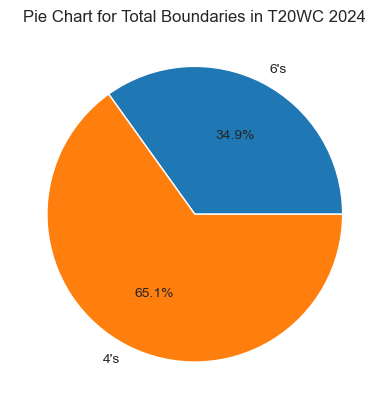

In [46]:
sixes = int(len(sixes_df))
fours = int(len(fours_df))
plt.title('Pie Chart for Total Boundaries in T20WC 2024')
plt.pie(x = [sixes, fours] , labels=["6's", "4's"], autopct='%.1f%%')
plt.show()

**OBSERVATIONS**
- Total **Boundaries** - 1487
- Total Number of **Sixes** - 519
- Total Number of **fours** - 968
---

<center><h3 id = 'sec3.5.4'>4. Types of Wicket in T20WC 2024</h3></center>

In [47]:
wicket_types = deliveries.groupby('wicket_type')['match_id'].count().sort_values(ascending=False).reset_index()
wicket_types

,wicket_type,match_id
0,caught,401
1,bowled,131
2,lbw,72
3,run out,39
4,caught and bowled,23
5,stumped,15
6,retired hurt,2
7,retired out,1


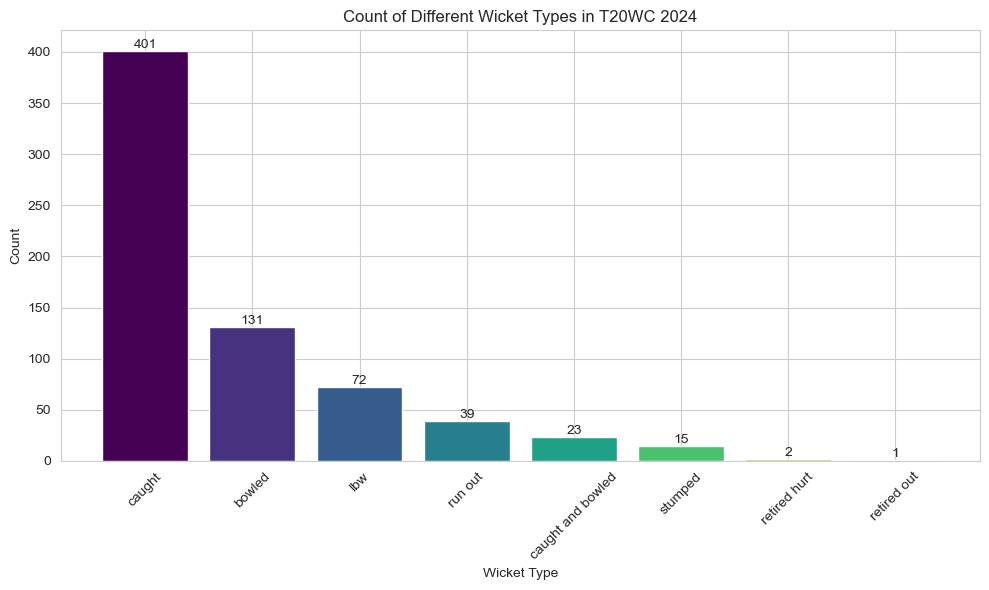

In [48]:
# Assuming 'wicket_types' is already defined
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Define a color palette using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(wicket_types)))

# Create the bar plot with a color palette
bars = plt.bar(wicket_types['wicket_type'], wicket_types['match_id'], color=colors)

# Add labels and title
plt.xlabel('Wicket Type')
plt.ylabel('Count')
plt.title('Count of Different Wicket Types in T20WC 2024')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each bar with the count (value)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Ensures everything fits nicely
plt.show()

**OBSERVATIONS**
- Total Number of Wickets by **Catch** - 401
- Total Number of Wickets by **Bowled** - 131
- Total Number of Wickets by **LBW** - 72
- Total Number of Wickets by **Runout** - 39
- Total Number of Wickets by **Caught and Bowled** - 23
- Total Number of Wickets by **Stumped** - 15
- Total Number of Wickets by **Retired Hurt** - 2
- Total Number of Wickets by **Retired Out** - 1
---